In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
import os 
os.getcwd()

'/content'

In [3]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/drive/MyDrive/ESAA(22-1)/Week2/diabetes.csv')

#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Basic EDA and statistical analysis

In [4]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Can minimum value of below listed columns be zero (0)?  
On these columns, a value of zero does not make sense and thus indicates missing value.  

Following columns or variables have an invalid zero value:  

1)Glucose  
2)BloodPressure  
3)SkinThickness  
4)Insulin  
5)BMI  

It is better to replace zeros with nan since after that counting them would be easier and zeros need to be replaced with suitable values

In [7]:
diabetes_data_copy = diabetes_data.copy(deep=True)
diabetes_data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [9]:
# showing the cound of NaNs
print(diabetes_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


To fill these Nan values, the data distribution needs to be understood

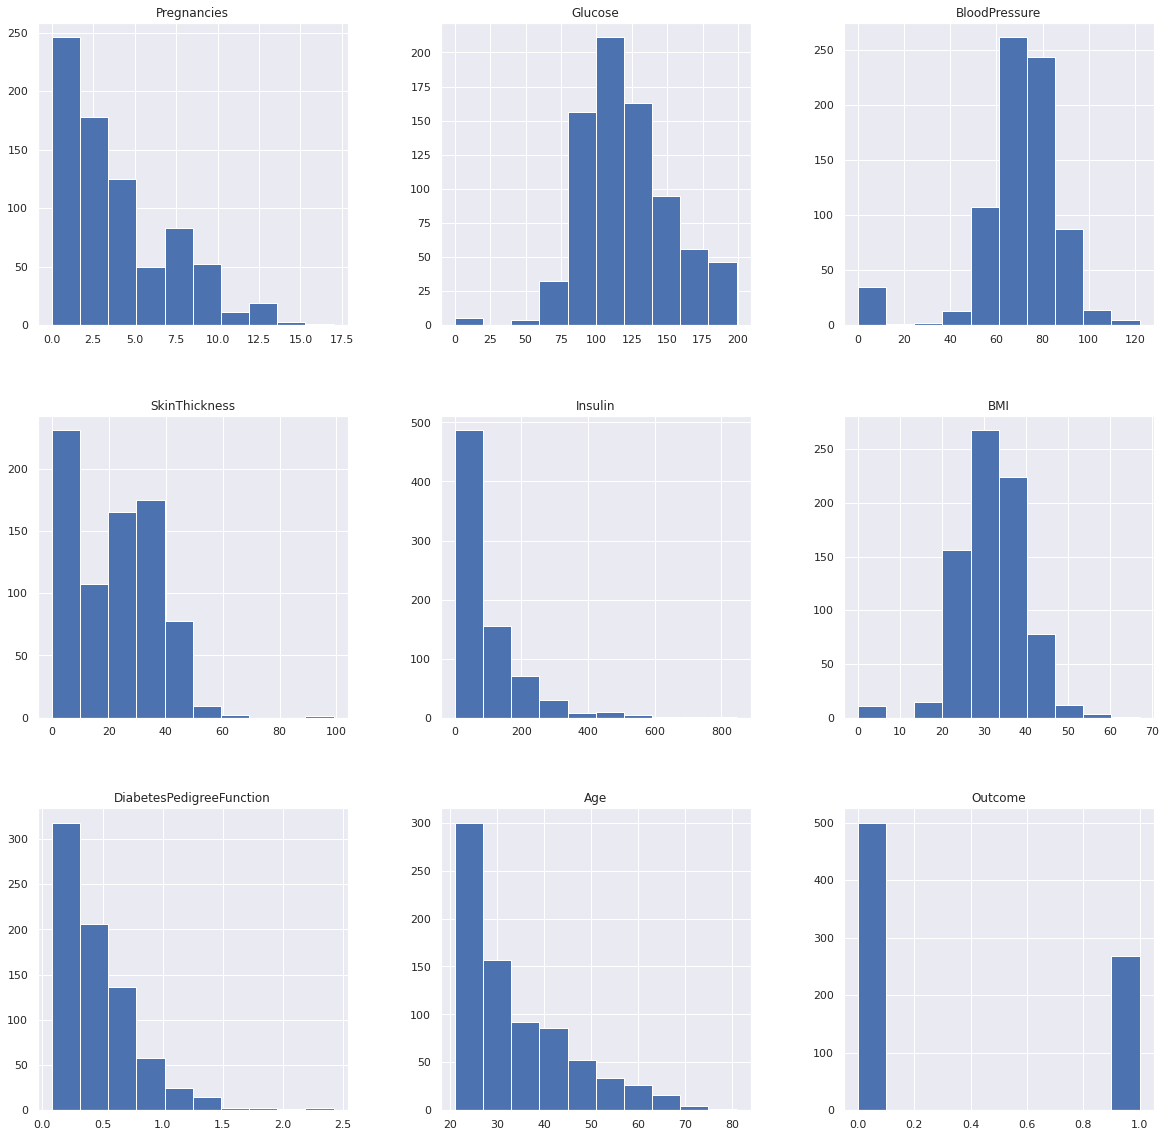

In [10]:
p = diabetes_data.hist(figsize = (20,20))

In [11]:
# Glucose 열 NaN 값 평균으로 대체
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(),inplace=True)

#BloodPressure 열 NaN 값 평균으로 대체
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(),inplace=True)

#SkinThickness 열 NaN 값 중앙값(median)으로 대체
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].mean(),inplace=True)

#Insulin 열 NaN 값 중앙값(median)으로 대체
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(),inplace=True)

#BMI 열 NaN 값 중앙값(median)으로 대체
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(),inplace=True)

#Plotting after NaN removal

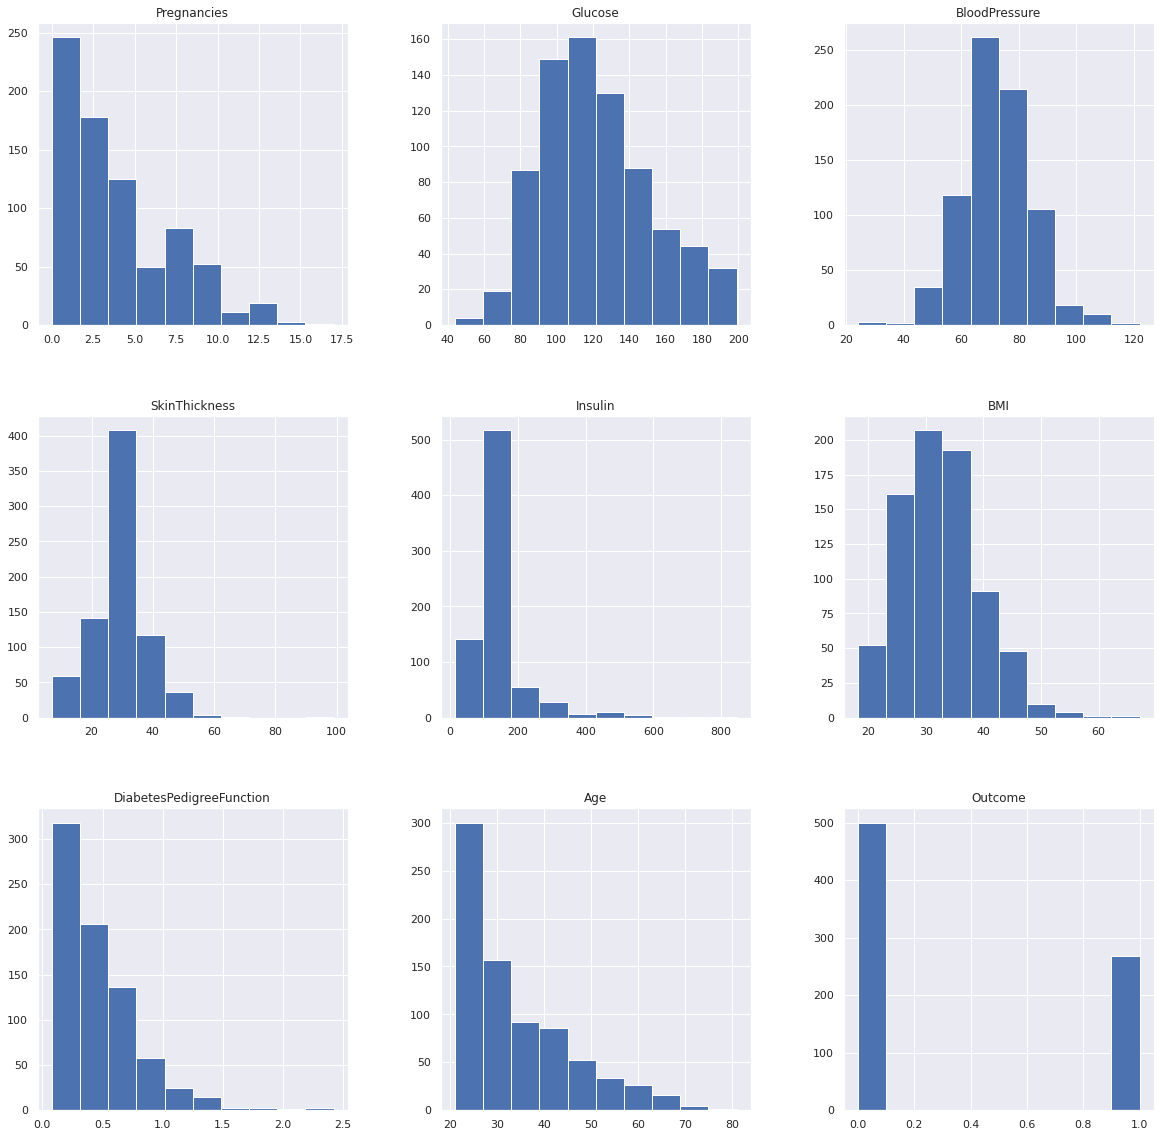

In [12]:
p = diabetes_data_copy.hist(figsize=(20,20))

In [13]:
## observing the shape of the data
diabetes_data.shape

(768, 9)

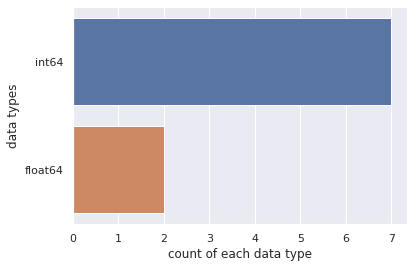

In [14]:
##data type analysis
#plt.figure(figsize=(5,5))
#sns.set(fond_scle=2)
sns.countplot(y=diabetes_data.dtypes, data = diabetes_data)
plt.xlabel("count of each data type")
plt.ylabel("data types")
plt.show()

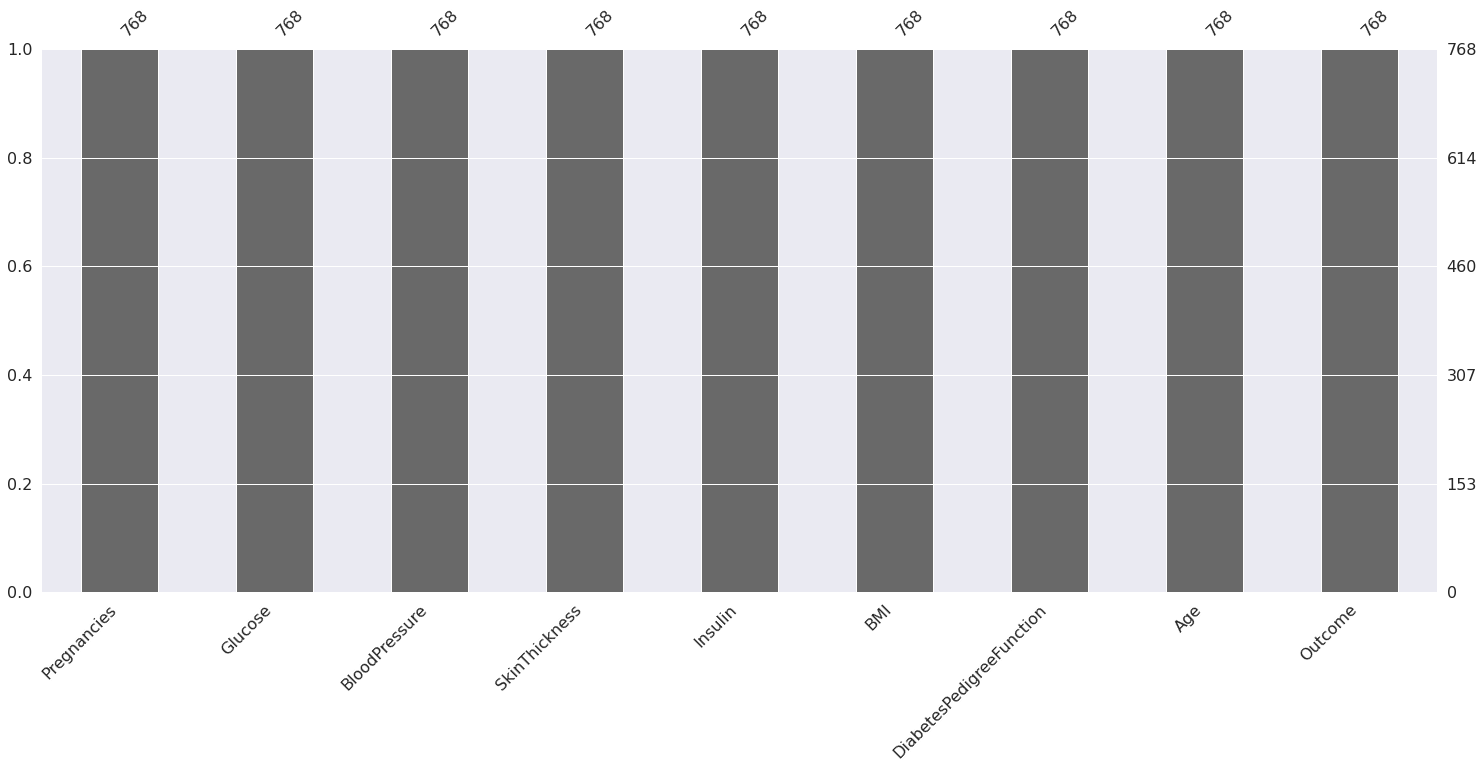

In [15]:
##null count analysis
import missingno as msno
p = msno.bar(diabetes_data)

0    500
1    268
Name: Outcome, dtype: int64


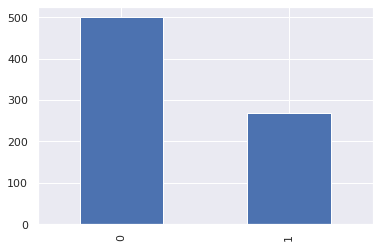

In [16]:
##checking the balance of the data by plotting the count of outcomes by their value
color_wheel = {1:"#0392cf",2:"#7bc043"}
colors = diabetes_data["Outcome"].map(lambda x: color_wheel.get(x+1))  #get(1) = #0392cf
print(diabetes_data.Outcome.value_counts())
p = diabetes_data.Outcome.value_counts().plot(kind = 'bar')

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

Scatter matrix of uncleaned data

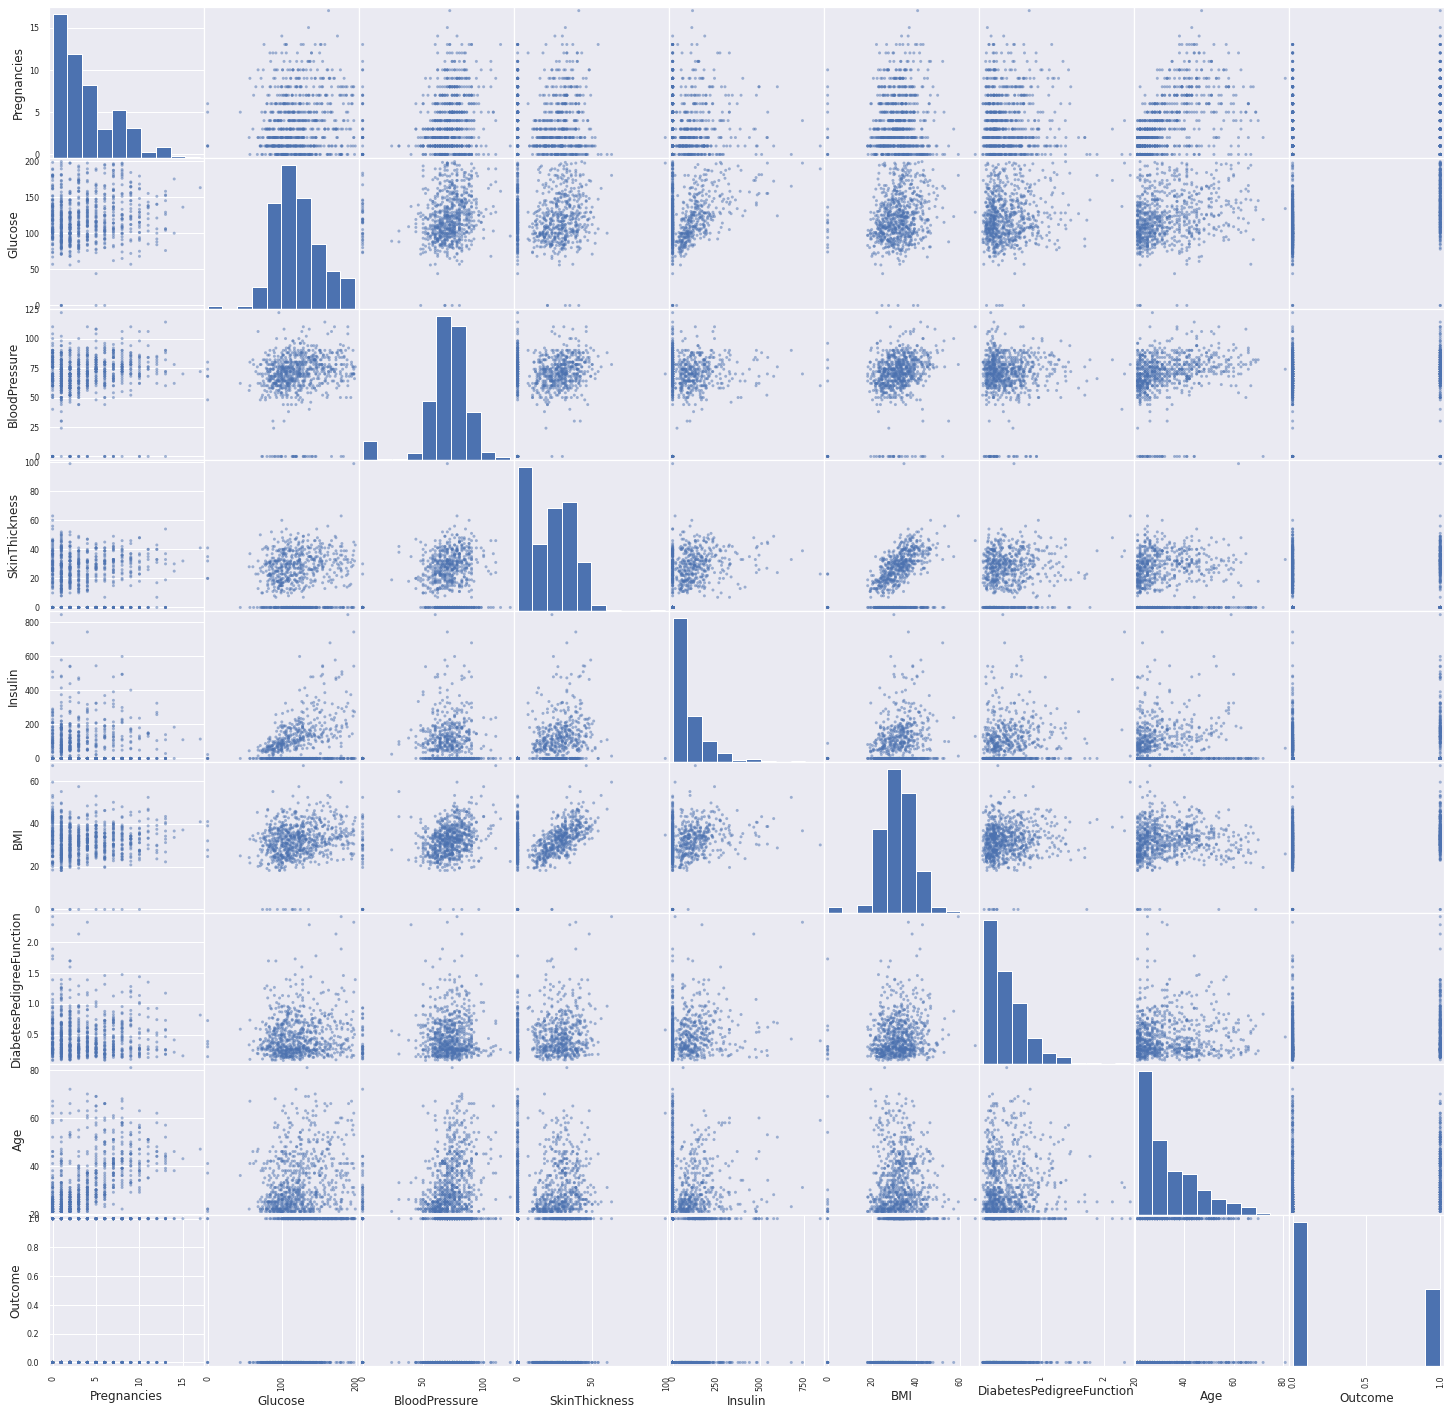

In [17]:
from pandas.plotting import scatter_matrix
p = scatter_matrix(diabetes_data,figsize = (25,25))

Pair plot for clean data

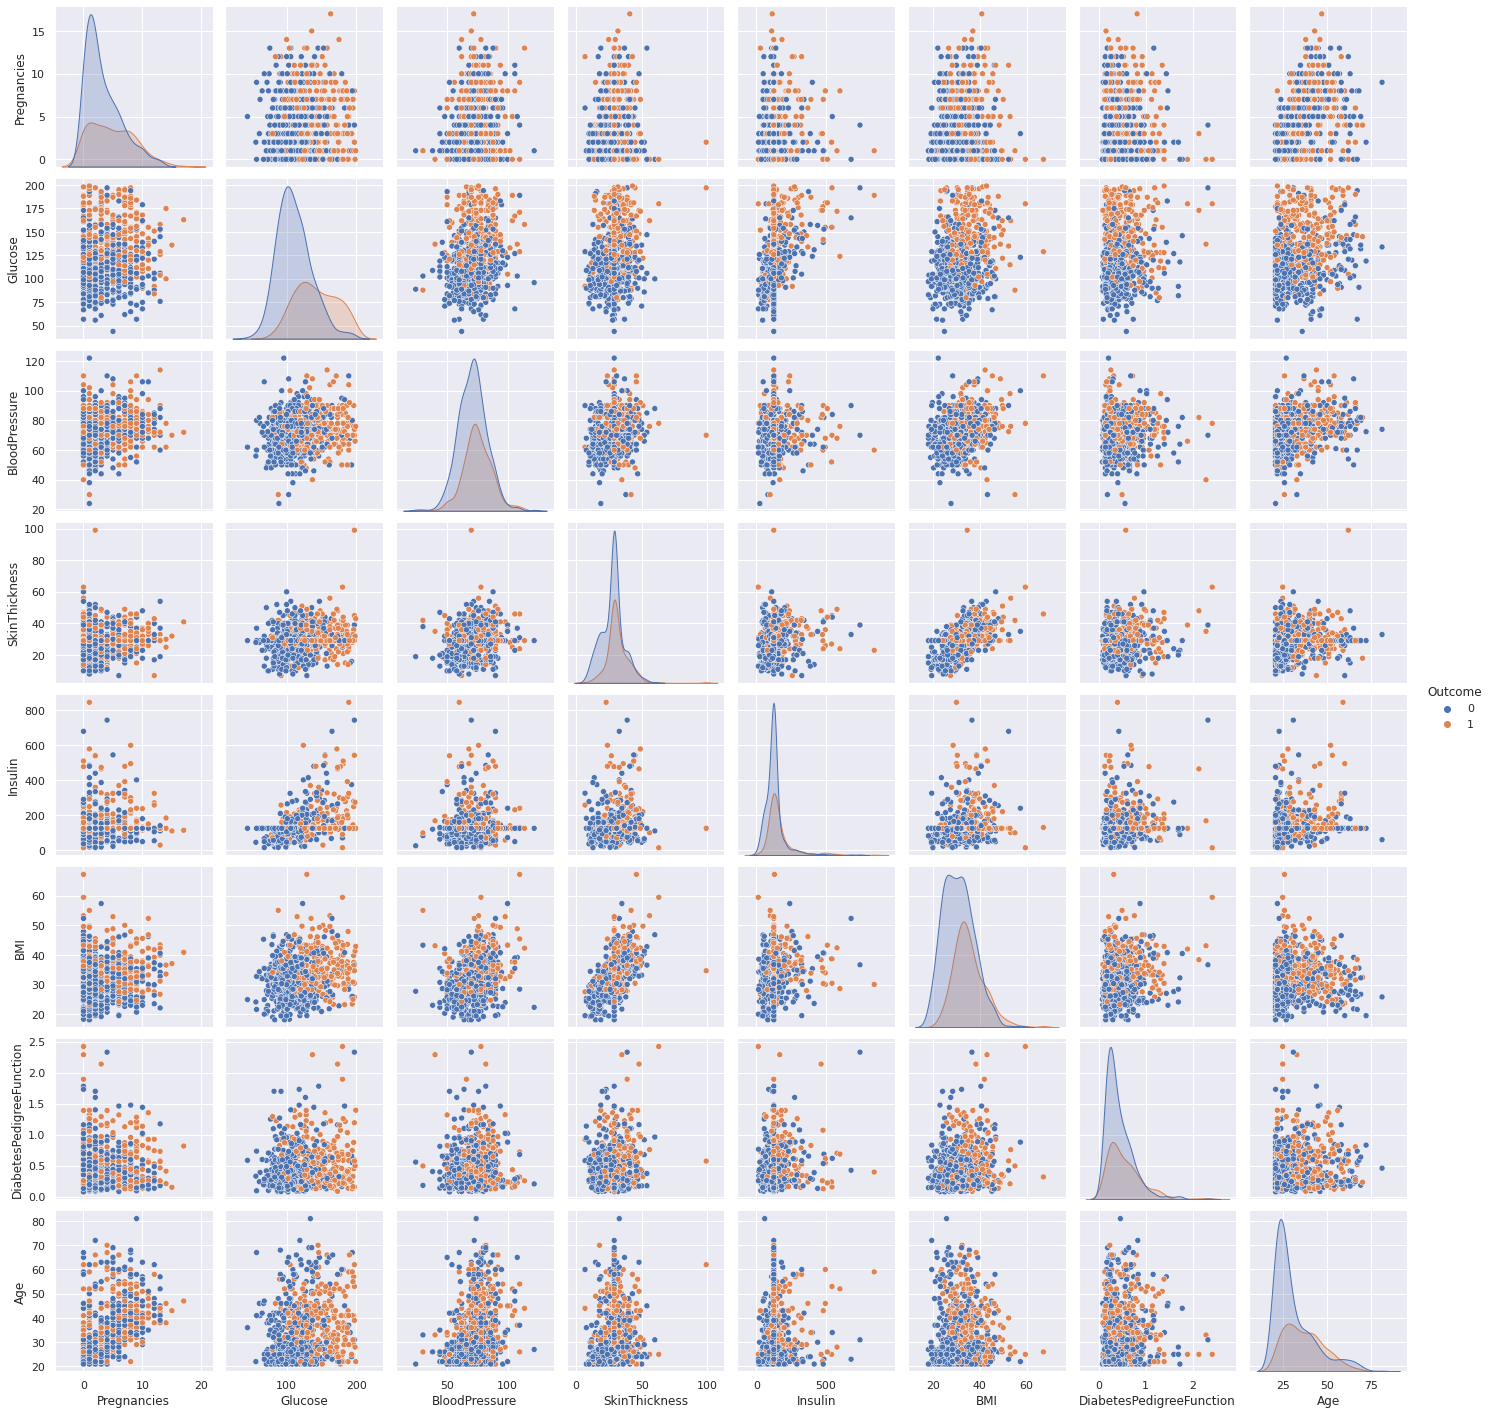

In [18]:
p = sns.pairplot(diabetes_data_copy,hue='Outcome')

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

**Pearson's Correlation Coefficient**  
: measure of the strength of association between two variables ( -1 to +1)  
1 -> highly correlated   
0 -> no correlation

Heatmap for unclean data

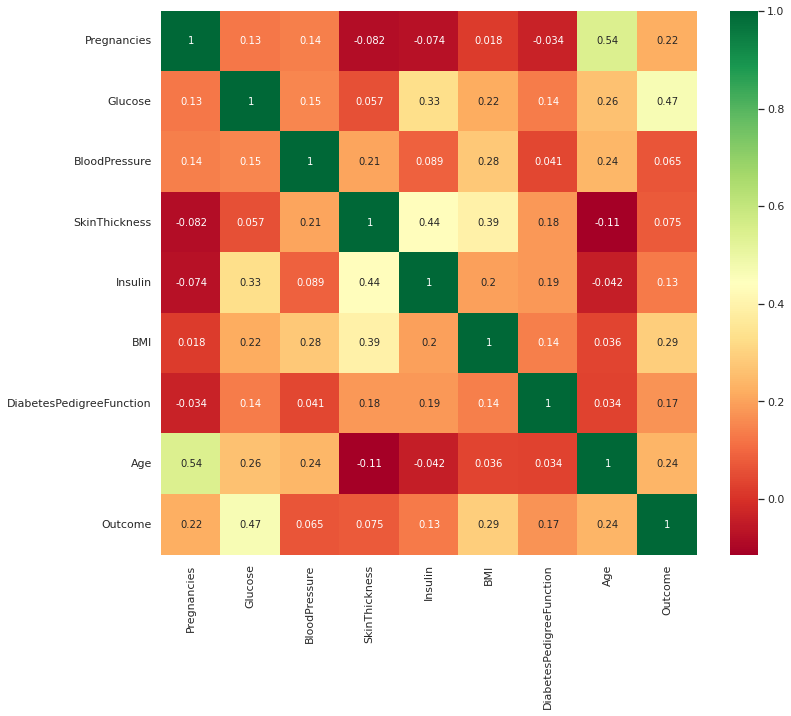

In [19]:
plt.figure(figsize = (12,10))
p = sns.heatmap(diabetes_data.corr(),annot=True,cmap='RdYlGn')

Heatmap for clean data

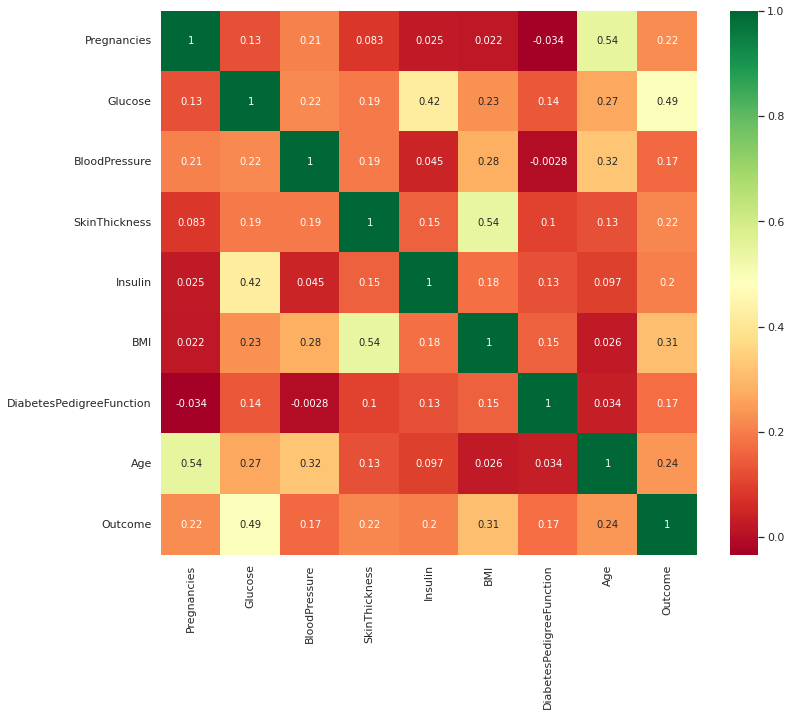

In [20]:
plt.figure(figsize = (12,10))
p = sns.heatmap(diabetes_data_copy.corr(),annot=True, cmap='RdYlGn')

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

#Scaling the data

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data_copy.drop(['Outcome'],axis=1),),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                          'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [22]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,0.316566,1.549303,5.484909,-0.020496


In [23]:
# X = diabetes_data.drop("Outcome",axis=1)
y = diabetes_data_copy.Outcome

#Why Scaling the data for KNN?

it is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.

We can imagine how the feature with greater range with overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.

**Cross Validation**: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

**About Stratify** : Stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.  

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [24]:
#importing train_test_split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1/3,random_state=42,stratify=y)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)

    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))


In [26]:
train_scores

[1.0,
 0.845703125,
 0.8671875,
 0.8359375,
 0.828125,
 0.806640625,
 0.81640625,
 0.806640625,
 0.80078125,
 0.802734375,
 0.80078125,
 0.794921875,
 0.798828125,
 0.794921875]

In [27]:
test_scores

[0.73046875,
 0.73046875,
 0.75,
 0.7421875,
 0.7421875,
 0.72265625,
 0.7421875,
 0.74609375,
 0.74609375,
 0.73046875,
 0.76171875,
 0.734375,
 0.75,
 0.734375]

In [31]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)

train_scores_ind = [i for i,v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [33]:
'''score that comes from testing on the datapoints that were split in the beginning
to be used for testing solely'''
max_test_score = max(test_scores)
test_scores_ind = [i for i,v in enumerate(test_scores) if v == max_test_score]
print('Mas test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1,test_scores_ind))))

Mas test score 76.171875 % and k = [11]


#Result Visualisation

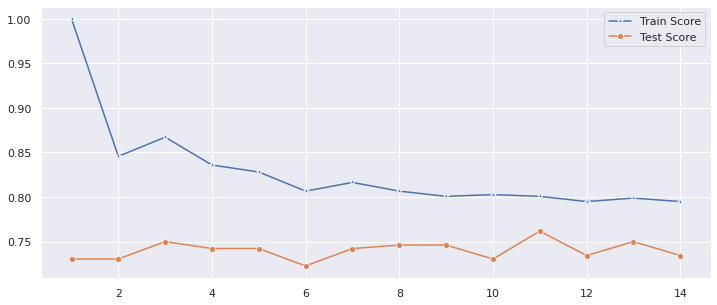

In [34]:
plt.figure(figsize = (12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores, marker = 'o',label = 'Test Score')

The best result is captured at k = 11 hence 11 is used for the final model

In [36]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.76171875

In [37]:
##trying to plot decision boundary

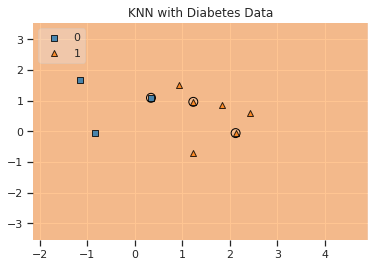

In [40]:
value = 20000
width = 20000
plot_decision_regions(X.values,y.values, clf =knn, legend=2, filler_feature_values ={
    2 : value, 3: value, 4:value, 5:value, 6: value, 7: value},
    filler_feature_ranges = {2: width, 3: width, 4: width, 5: width, 6: width, 7:width},
    X_highlight = X_test.values)

# Adding axes annotations
plt.title('KNN with Diabetes Data')
plt.show()

#Model Performance Analysis

##1. Confusion Matrix

In [41]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test,y_pred, rownames=['True'],colnames=['Predicted'],margins=True)

Predicted,0,1,All
True,,,
0,141,26,167
1,35,54,89
All,176,80,256


Text(0.5, 12.5, 'Predicted label')

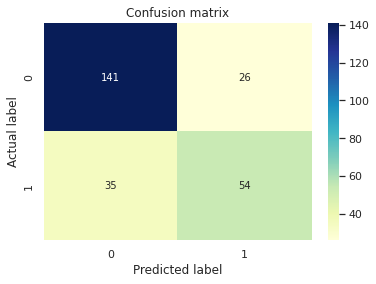

In [43]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## 2. Classification Report

**Precision Score**  
Precision = TP/(TP + FP)  

**Recall Score**  
: Fraction of positives that were correctly identified  
Recall = TP/(TP + FN)  

**F1 Score**
: takes into accound precision and the recall  
finding harmonic mean of precision and recall  
F1 = 2 x (precision x recall)/(precision + recall)  


In [44]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       167
           1       0.68      0.61      0.64        89

    accuracy                           0.76       256
   macro avg       0.74      0.73      0.73       256
weighted avg       0.76      0.76      0.76       256



##3. ROC-AUC

ROC Curve tells us about how good the model can distinguish between two things. Better models can accurately distinguish between the two.

In [45]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

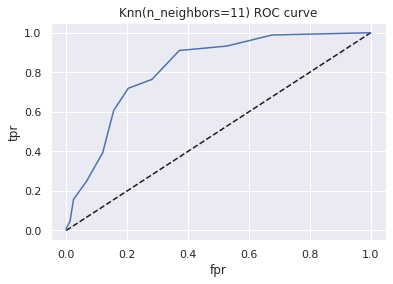

In [46]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr,label='knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [47]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8187108928210993

#Hyper Parameter Optimization

Grid search is an approach to hyperparameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid.

In [48]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:"+str(knn_cv.best_score_))
print('Best Parameters:'+str(knn_cv.best_params_))

Best Score:0.7734827264239028
Best Parameters:{'n_neighbors': 25}
